# Preprocessing of smoking.csv dataset for unsupervised learning

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# load data - using train_data.csv because of previous preprocessing
unsup_data = pd.read_csv("data/train_data.csv")

### Subsetting
**We want to select only males that have dental caries and are in their early 20s**

In [11]:
# filter males, then drop gender column
unsup_data = unsup_data.loc[unsup_data['gender']>0]
unsup_data.drop(['gender'], axis=1, inplace=True)

# filter dental caries, then drop column
unsup_data = unsup_data.loc[unsup_data['dental_caries']>0]
unsup_data.drop(['dental_caries'], axis=1, inplace=True)

# filter 20-year-olds, then drop column
unsup_data = unsup_data.loc[unsup_data['age']==20]
unsup_data.drop(['age'], axis=1, inplace=True)

# count how many smokers are in the subset
print(unsup_data.smoking.sum())
unsup_data

200


,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting_blood_sugar,...,ast,alt,gtp,tartar,smoking,bmi,healthy_weight,eyesight_total,vision,hearing_impairment
284,175,75,79.8,1.5,1.5,1.0,1.0,122.0,74.0,89.0,...,24.0,16.0,35.0,0,1,24.49,0.0,3.0,0,0
327,175,75,85.0,1.0,1.0,1.0,1.0,120.0,70.0,92.0,...,20.0,32.0,24.0,0,1,24.49,0.0,2.0,1,0
527,170,70,78.0,1.0,1.2,1.0,1.0,119.0,73.0,91.0,...,24.0,16.0,20.0,1,0,24.22,0.0,2.2,1,0
647,170,60,71.0,1.2,1.5,1.0,1.0,108.0,78.0,88.0,...,20.0,14.0,17.0,1,1,20.76,0.0,2.7,0,0
663,170,75,78.1,0.5,0.7,1.0,1.0,102.0,60.0,108.0,...,21.0,18.0,25.0,1,1,25.95,1.0,1.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44444,175,65,70.0,1.5,1.2,1.0,1.0,118.0,78.0,89.0,...,24.0,22.0,26.0,0,1,21.22,0.0,2.7,0,0
44465,170,80,86.1,2.0,1.5,1.0,1.0,118.0,78.0,95.0,...,30.0,64.0,38.0,1,1,27.68,1.0,3.5,0,0
44530,170,70,87.2,1.2,1.2,1.0,1.0,136.0,80.0,85.0,...,22.0,15.0,17.0,1,0,24.22,0.0,2.4,1,0
44538,175,70,82.0,1.0,0.9,1.0,1.0,120.0,70.0,99.0,...,35.0,39.0,27.0,1,0,22.86,0.0,1.9,1,0


### Feature rescaling

In [12]:
num_cols = ["height(cm)", "weight(kg)", "waist(cm)", "eyesight(left)", "eyesight(right)", "hearing(left)", "hearing(right)", "systolic", "fasting_blood_sugar","cholesterol", "triglyceride", "hdl", "ldl", "hemoglobin", "relaxation", "serum_creatinine", "ast", "alt", "gtp", "bmi"]
print(unsup_data.describe())
se = StandardScaler()
unsup_data[num_cols] = se.fit_transform(unsup_data[num_cols])
print(unsup_data.describe())

       height(cm)  weight(kg)   waist(cm)  eyesight(left)  eyesight(right)   
count  371.000000  371.000000  371.000000      371.000000       371.000000  \
mean   172.075472   71.671159   81.320216        1.085984         1.067385   
std      5.539023   12.115869    8.785615        0.348693         0.356315   
min    160.000000   45.000000   62.000000        0.100000         0.100000   
25%    170.000000   65.000000   75.000000        0.900000         0.900000   
50%    170.000000   70.000000   81.000000        1.000000         1.000000   
75%    175.000000   80.000000   87.000000        1.200000         1.200000   
max    185.000000  110.000000  110.000000        2.000000         2.000000   

       hearing(left)  hearing(right)    systolic  relaxation   
count     371.000000      371.000000  371.000000  371.000000  \
mean        1.008086        1.005391  119.886792   74.043127   
std         0.089680        0.073323   12.084527    8.690677   
min         1.000000        1.000000   90

### Visualize to compare with clustering

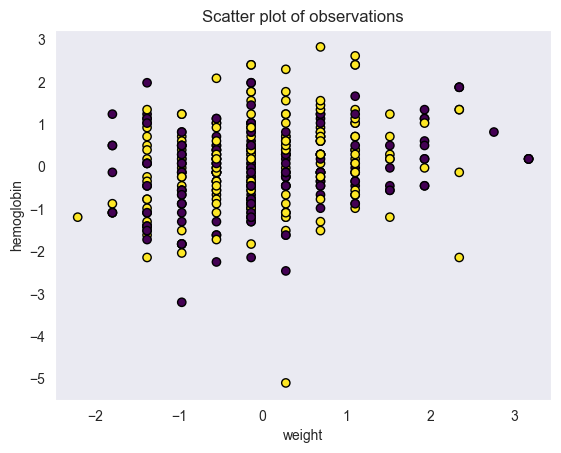

In [13]:
# plot of variables with the highest correlation with target
plt.scatter(x = unsup_data['weight(kg)'], y = unsup_data['hemoglobin'], c = unsup_data['smoking'], cmap = 'viridis', edgecolors='k')
plt.title('Scatter plot of observations')
plt.xlabel('weight')
plt.ylabel('hemoglobin')
plt.grid(False)
plt.show()


# Principal Component Analysis

       target      pca1      pca2
284         1 -1.344923 -1.749165
327         1  0.385150  0.238137
527         0 -1.133579  0.217776
647         1 -2.007626 -1.046821
663         1 -0.594788  2.124993
...       ...       ...       ...
44444       1 -1.418710 -1.292505
44465       1  1.587550 -3.580762
44530       0 -0.013114 -0.329391
44538       0  0.432734  0.683308
44546       0 -0.072017 -2.027749

[371 rows x 3 columns]


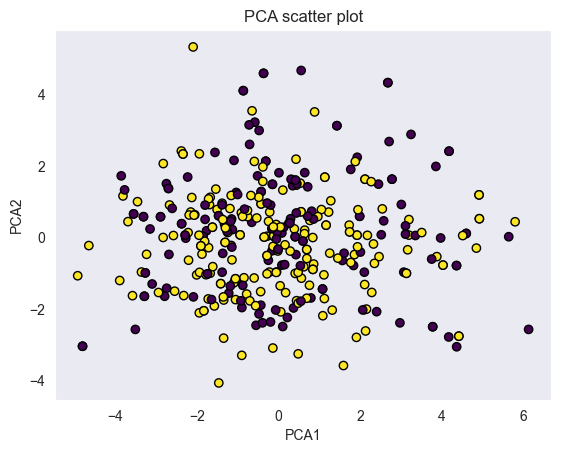

In [14]:
# initialize PCA class
pca = PCA(n_components = 2)

# create components
pca_data = pca.fit_transform(unsup_data)

# save components to dataset, so we can plot them and create csv
y = pd.DataFrame()
y['target'] = unsup_data['smoking']
y['pca1'] = pca_data[:,0]
y['pca2'] = pca_data[:,1]
print(y)

# plot PCA color coded by smoking variable
plt.scatter(x = y['pca1'], y = y['pca2'], c=y['target'], cmap = 'viridis', edgecolors='k')
plt.title('PCA scatter plot')
plt.axis()
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(False)
plt.show()



### Get rid of target variable - smoking

In [15]:
y.drop(['target'], axis=1, inplace=True)
unsup_data.drop(['smoking'], axis=1, inplace=True)

### Dump dataframe to csv

In [16]:
y.to_csv("data/clustering_pca_data.csv", index_label=False, index=False)
unsup_data.to_csv("data/clustering_data.csv", index_label=False, index=False)